# Understanding of SHAP KernelExplainer

### 1. Abstract

The notebook aims to explain the understanding of SHAP KernelExplainer using Iris dataset. 

The notebook uses Support Vector Machine to train and predict the classification of Iris species:  Iris-setosa, Iris-virginaca and Iris-versicolor. The accuracy of the svm classifier on training data is 0.97 and on test data it is 1.00.

The summary plot indicates that petal length (cm) had the greatest influence on the predictions for all 3 classes - followed by petal width (cm).

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
import shap

### 2. Load data

In [2]:
# load the data
data = pd.read_csv('IRIS.csv') 
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In iris data set, four features are there , sepal length, sepal width, petal length, and petal width and one label (species).

Let's see the basic properties of the iris data table.

## 3. Exploratory Data Analysis

In [3]:
import pandas_profiling
data.profile_report()

##### Mean sepal_length, sepal_width, petal_length and petal_width for the species Iris-setosa, Iris-versicolor and Iris-virginica

In [4]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [5]:
data.species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

we see here iris data set is a balanced data set as all the 3 species( setosa, virginica, versicolor) have the number of data points is 50.

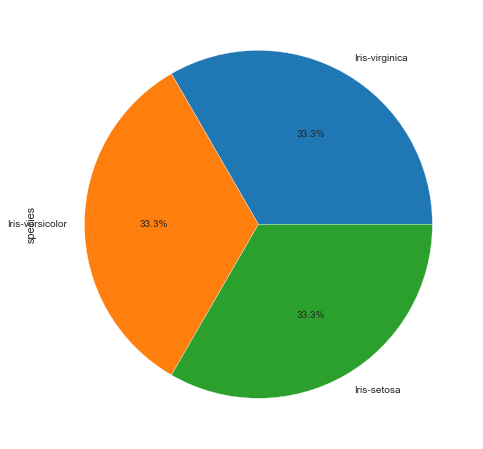

In [6]:
data.species.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8))
plt.show()

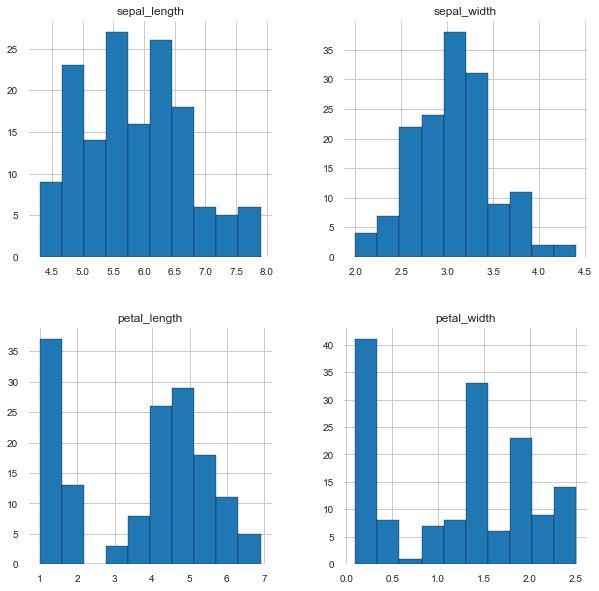

In [7]:
data.hist(edgecolor='black',figsize=(10,10))
plt.show()

##### Observations:
Sepal length and sepal width are normally distributed

#### Pairplot for pairwise relationships in a dataset

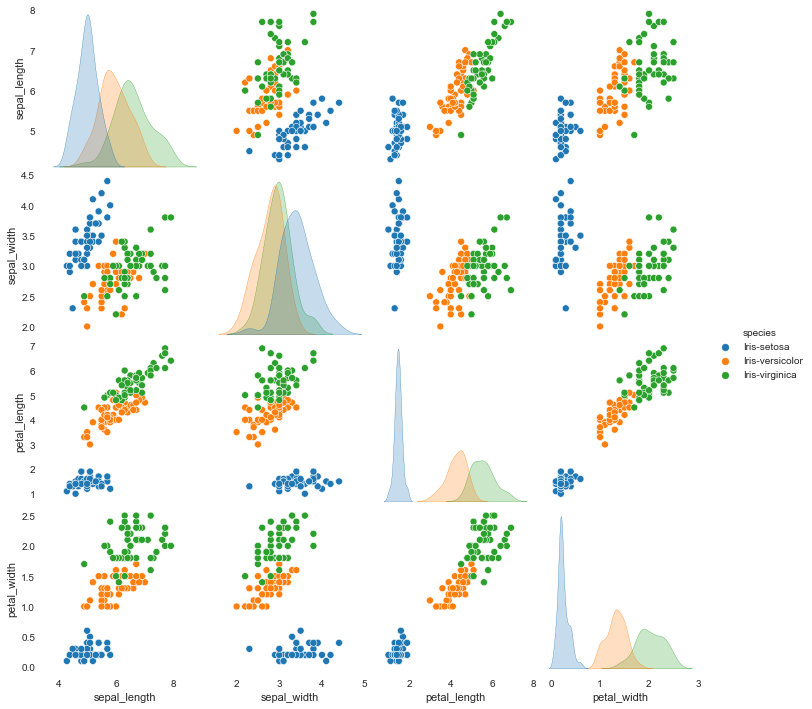

In [8]:
sns.pairplot(data , hue='species');

#### Observations:
  
Not sure  
  
There is multi-colinearity between the independent variables petal length - petal width and sepal length - petal length. 

### Univariate analysis



In [9]:
iris_setosa=data.loc[data['species']=='Iris-setosa']
iris_versicolor= data.loc[data['species']=='Iris-versicolor']
iris_virginica =data.loc[data['species']=='Iris-virginica']

Finding if any outliers for the above groups

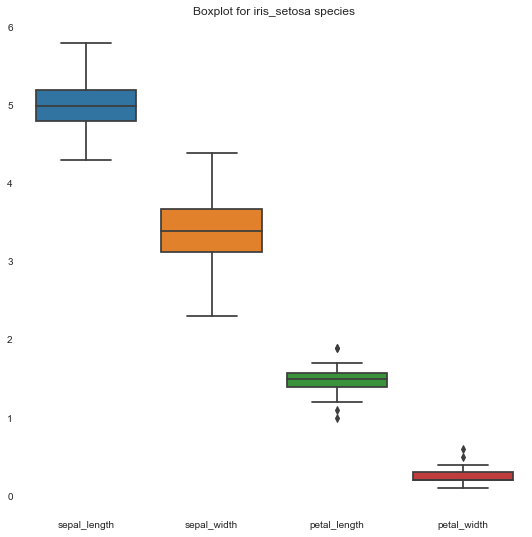

In [10]:
plt.figure(figsize=(9,9))
plt.title('Boxplot for iris_setosa species')
sns.boxplot(data=iris_setosa)
plt.show()

##### Observations:

1. There are outliers for petal length and petal width, so may not be sure with the pattern growth of iris flower setosa category
2. The sepal length median is maximum of all the features
3. The sepal width of some iris setosa category flowers are overlapping with the sepal length, there might be a case where iris setosa has same sepal length and width.
4. The petal growth is far lesser than sepal growth in both dimensions for thi variety

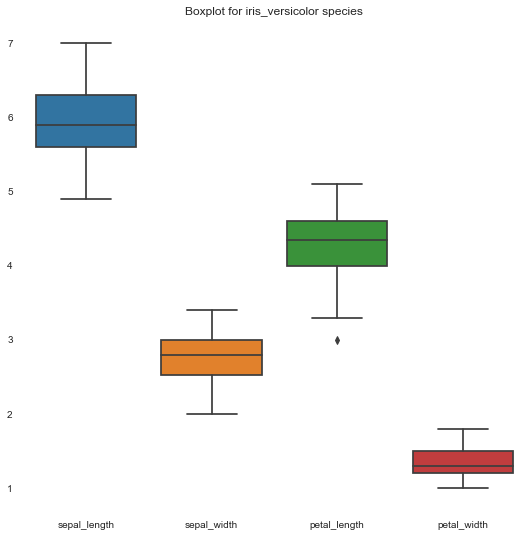

In [11]:
plt.figure(figsize=(9,9))
plt.title('Boxplot for iris_versicolor species')
sns.boxplot(data=iris_versicolor)
plt.show()

#### Observations for the above boxplots for iris versicolor:

1. There are outliers for petal length
2. The median of petal length is far greater then the petal width, means this variety has lesser broadness
3. The median of sepal length is far greater than the sepal width, means this variety has lesser broadness
4. There are more flowers having sepals longer than the petals in this variety

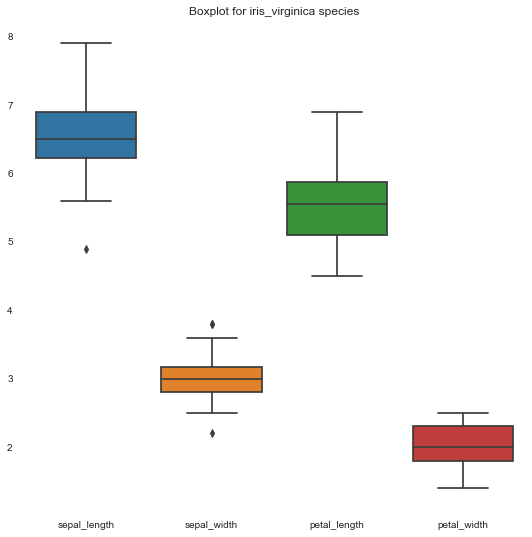

In [12]:
plt.figure(figsize=(9,9))
plt.title('Boxplot for iris_virginica species')
sns.boxplot(data=iris_virginica)
plt.show()

#### Observations from the above boxplot for iris_virginica:

1. There are outliers for sepal length and sepal width, so there might be improper pattern growth for this variety.
2. The median of petal length is far greater then the petal width, means this variety has lesser broadness
3. The median of sepal length is far greater than the sepal width, means this variety has lesser broadness


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


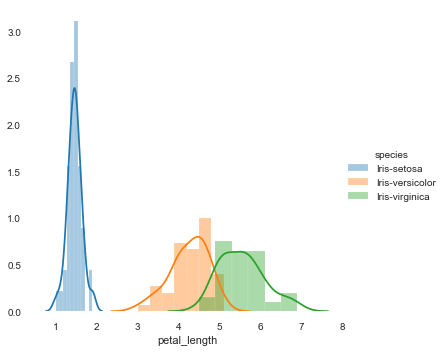

In [13]:
sns.FacetGrid(data,hue="species",height=5).map(sns.distplot,"petal_length").add_legend();

It is observed that on the basis of petal length setosa is separable while the other two are overlapping

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


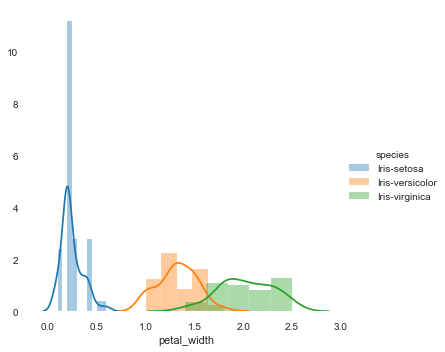

In [14]:
sns.FacetGrid(data,hue="species",height=5).map(sns.distplot,"petal_width").add_legend();

It can be infered that  the setosa is easily separable while some portions of Versicolor and virginica are mixed for the petal_width.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


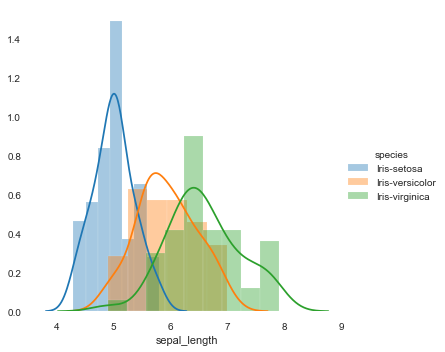

In [15]:
sns.FacetGrid(data,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend();

It is quite tough to separate the species on the basis of sepal_length alone.

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


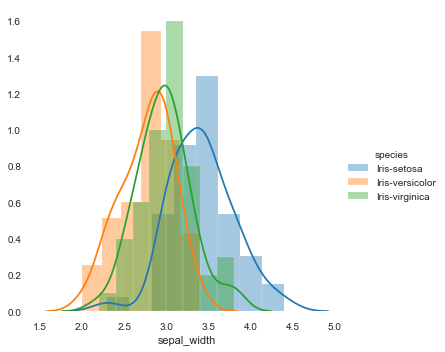

In [16]:
sns.FacetGrid(data,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend();

While the overlapping of species is more intense in the case of sepal_width ((same color))

In [17]:
# one-hot encoding for target
species = {
    "species" : {"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}
}
data.replace(species,inplace=True)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


## 4. Train test split


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x = data.drop('species', axis=1)
y= data.species


In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 5. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


## 6. Support Vector Machine

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0,probability=True)
svm.fit(X_train, Y_train)

print('The accuracy of the svm classifier on training data is {:.2f}'.format(svm.score(X_train, Y_train)))

print('The accuracy of the svm classifier on test data is {:.2f}'.format(svm.score(X_test, Y_test)))

The accuracy of the svm classifier on training data is 0.97
The accuracy of the svm classifier on test data is 1.00


## 7. Interpretation using Shap values

In [23]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model=svm.predict_proba, data=X_train, link="logit")

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [24]:
shap_values = explainer.shap_values(X=X_test, nsamples=100, l1_reg="num_features(4)")

In [25]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 3
Shape of each element: (30, 4)


### Explaining a single prediction

In [26]:
# plot the SHAP values for the Setosa output of the first instance
print(f'Prediction for 1st sample in X_test: {svm.predict_proba(X_test.iloc[[0], :])[0]}')
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

Prediction for 1st sample in X_test: [0.00965672 0.0179732  0.97237008]


###### Observations for shap_plot(0):

Output value: is the prediction for this observation

Base value: The original paper explains that the base value E(y_hat) is "the value that would be predicted if we did not know any features for the current output." In other words, it is the mean prediction, or mean(yhat). So the mean prediction of Y_test is 0.19.

Features: The above explanation shows features that contributes to push the final prediction away from the base value.

Red/blue: Those features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Petal length: has a negative impact on the species. A lower value than the average petal length drives the prediction to the right.

Petal width: has a negative impact on the species. A lower value than the average petal width drives the prediction to the right.

Sepal width: has a negative impact on the species. A lower value than the average sepal length drives the prediction to the right.

In [27]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:], link="logit")

In [28]:
shap.force_plot(explainer.expected_value[2], shap_values[2][0,:], X_test.iloc[0,:], link="logit")

### Collective force plot 

Explaining the Prediction for all 30 samples in Test set

If we take the above plot for any one class for each sample, rotate them 90 degrees and stack them side-by-side, we can explain the predictions for multiple samples in a single plot

In [29]:
## Setosa output
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [30]:
## Versicolor output
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

In [31]:
## Virginica output
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2], X_test)

## SHAP Summary plots

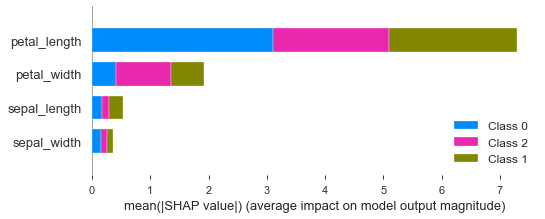

In [32]:
shap.summary_plot(shap_values, X_test)

#### Observations: how reliable and what it says
*others should understand*
explain the interactions

The above plot indicates that petal length (cm) had the greatest influence on the predictions for all 3 classes followed by petal width (cm).

If provided with a single set of SHAP values (shap values for a single class for a classification problem or shap values for a regression problem), shap.summary_plot() creates a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output. Features are sorted by the sum of the SHAP value magnitudes across all samples.


The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

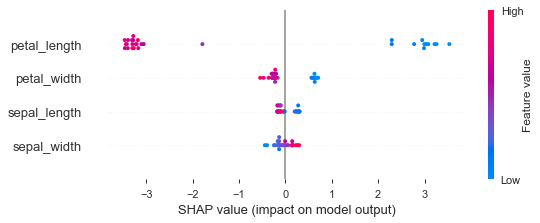

In [33]:
## Setosa output
shap.summary_plot(shap_values[0], X_test)

For Setosa output, we see that the low values of petal length (cm) (indicated by blue colored dots) increases the probability that the sample is classified as Setosa (high shap values).

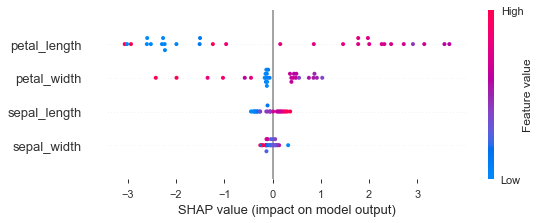

In [34]:
## Versicolor output
shap.summary_plot(shap_values[1], X_test)

explain 

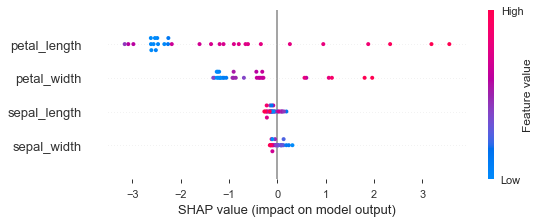

In [35]:
## Virginica output
shap.summary_plot(shap_values[2], X_test)

## SHAP Dependence Plots

SHAP Depencence plots reveal interaction effects.

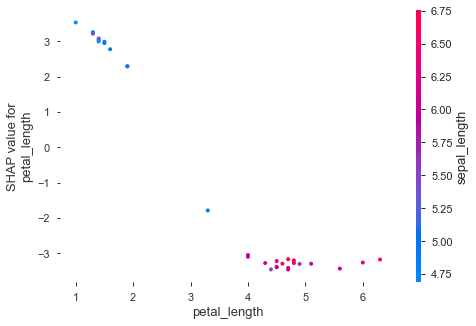

In [36]:
## Setosa output
shap.dependence_plot("petal_length", shap_values[0], X_test)

The Setosa output depicts the interaction between petal length (cm) and sepal length (cm).

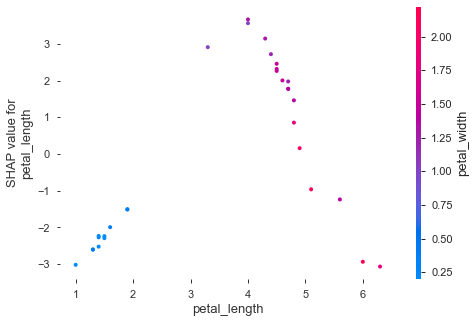

In [37]:
## Versicolor output
shap.dependence_plot("petal_length", shap_values[1], X_test)

The Versicolor output depicts the interaction between petal length (cm) and petal width (cm).

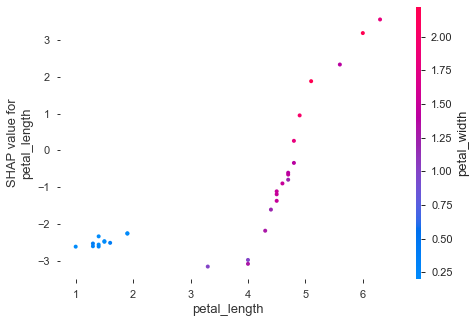

In [38]:
## Virginica output
shap.dependence_plot("petal_length", shap_values[2], X_test)


The Virginica output depicts the interaction between petal length (cm) and petal width (cm).

## 8. Conclusion

The summary plot indicates that petal length (cm) had the greatest influence on the predictions for all 3 classes - followed by petal width (cm).

## 11. Refrence

https://shap.readthedocs.io/en/latest/tabular_examples.html
https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214889-eng.html
https://www.geeksforgeeks.org/random-forest-regression-in-python/

Copyright 2020 Pranatha Rajaprasad Rao

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.